In [1]:
import os
# Get the current working directory (where the notebook is located)
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
# Change the working directory to the parent directory
os.chdir(parent_dir)

In [2]:
import torch
from p2ch14.training import LunaTrainingApp
args = [
    '--num-workers', '1',  # Example: Set number of workers to 1
    '--batch-size', '2',  # Example: Set batch size to 2
    '--epochs', '1',       # Example: Set number of epochs to 1
]
app = LunaTrainingApp(args)
app

2024-12-04 20:37:17,940 INFO     pid:32876 p2ch14.training:132:initModel Using CUDA; 1 devices.


In [3]:
train_dl = app.initTrainDl()
val_dl = app.initValDl()

2024-12-04 20:37:23,259 INFO     pid:32876 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000002D9BD3236A0>: 495958 training samples, 494743 neg, 1215 pos, unbalanced ratio
2024-12-04 20:37:23,306 INFO     pid:32876 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000002D9BD323FA0>: 55107 validation samples, 54971 neg, 136 pos, unbalanced ratio


In [4]:
num_epochs = 1
train_dl_subset = app.get_dl_subset(train_dl, num_samples=100)
for epoch_ndx in range(1, num_epochs + 1):
    trnMetrics_t = app.doTraining(epoch_ndx, train_dl_subset)

E1 Training: 100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


In [5]:
from p2ch14.training import METRICS_LABEL_NDX, METRICS_PRED_NDX, METRICS_LOSS_NDX, METRICS_SIZE
classificationThreshold = 0.5
metrics_t = trnMetrics_t

negLabel_mask = metrics_t[METRICS_LABEL_NDX] <= classificationThreshold
negPred_mask = metrics_t[METRICS_PRED_NDX] <= classificationThreshold

posLabel_mask = ~negLabel_mask
posPred_mask = ~negPred_mask

neg_count = int(negLabel_mask.sum())
pos_count = int(posLabel_mask.sum())

trueNeg_count = neg_correct = int((negLabel_mask & negPred_mask).sum())
truePos_count = pos_correct = int((posLabel_mask & posPred_mask).sum())

falseNeg_count = pos_count - pos_correct
falsePos_count = neg_count - neg_correct

In [6]:
print(f"{neg_count=}, {pos_count=}")
print(f"{trueNeg_count=}, {truePos_count=}")
print(f"{falseNeg_count=}, {falsePos_count=}")

neg_count=100, pos_count=0
trueNeg_count=100, truePos_count=0
falseNeg_count=0, falsePos_count=0


In [7]:
import numpy as np
recall = truePos_count / np.float32(truePos_count + falseNeg_count)
precision = truePos_count / np.float32(truePos_count + falsePos_count)
print(f"{recall=}, {precision=}")

recall=nan, precision=nan


C:\Users\howardhuang\AppData\Local\Temp\ipykernel_32876\1171323843.py:2: RuntimeWarning: invalid value encountered in divide
  recall = truePos_count / np.float32(truePos_count + falseNeg_count)
C:\Users\howardhuang\AppData\Local\Temp\ipykernel_32876\1171323843.py:3: RuntimeWarning: invalid value encountered in divide
  precision = truePos_count / np.float32(truePos_count + falsePos_count)


In [8]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

nan

In [9]:
app.logMetrics(1, "trn", trnMetrics_t)

2024-12-04 20:38:14,056 INFO     pid:32876 p2ch14.training:311:logMetrics E1 LunaTrainingApp
c:\Users\howardhuang\MyCode\DeepLearningWithPytorch-SecondEdition\code\p2ch14\training.py:341: RuntimeWarning: invalid value encountered in divide
  metrics_dict["correct/pos"] = pos_correct / np.float32(pos_count) * 100
c:\Users\howardhuang\MyCode\DeepLearningWithPytorch-SecondEdition\code\p2ch14\training.py:346: RuntimeWarning: invalid value encountered in divide
  truePos_count / np.float32(truePos_count + falseNeg_count)
c:\Users\howardhuang\MyCode\DeepLearningWithPytorch-SecondEdition\code\p2ch14\training.py:348: RuntimeWarning: invalid value encountered in divide
  truePos_count / np.float32(truePos_count + falsePos_count)
2024-12-04 20:38:14,100 INFO     pid:32876 p2ch14.training:353:logMetrics E1 trn      0.0003 loss, 100.0% correct, nan precision, nan recall, nan f1 score
2024-12-04 20:38:14,104 INFO     pid:32876 p2ch14.training:360:logMetrics E1 trn_neg  0.0003 loss, 100.0% correct (

In [10]:
app.cli_args.balanced = True
train_dl = app.initTrainDl()


2024-12-04 20:38:14,523 INFO     pid:32876 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000002D9EF98C6D0>: 495958 training samples, 494743 neg, 1215 pos, 1:1 ratio


In [11]:
num_epochs = 1
train_dl_subset = app.get_dl_subset(train_dl, num_samples=100)
for epoch_ndx in range(1, num_epochs + 1):
    trnMetrics_t = app.doTraining(epoch_ndx, train_dl_subset)

E1 Training: 100%|██████████| 50/50 [00:43<00:00,  1.16it/s]


In [12]:
app.logMetrics(1, "trn", trnMetrics_t)

2024-12-04 20:38:57,655 INFO     pid:32876 p2ch14.training:311:logMetrics E1 LunaTrainingApp
2024-12-04 20:38:57,661 INFO     pid:32876 p2ch14.training:353:logMetrics E1 trn      2.9745 loss,  53.0% correct, 0.4474 precision, 0.3953 recall, 0.4198 f1 score
2024-12-04 20:38:57,664 INFO     pid:32876 p2ch14.training:360:logMetrics E1 trn_neg  1.0628 loss,  63.2% correct (36 of 57)
2024-12-04 20:38:57,665 INFO     pid:32876 p2ch14.training:364:logMetrics E1 trn_pos  5.5086 loss,  39.5% correct (17 of 43)


In [13]:
from p2ch14.dsets import LunaDataset
from torch.utils.data import DataLoader, Subset
import random
 
dataset = LunaDataset(ratio_int=1)
subset_count = 48
print(f"Creating a subset dataset of {subset_count} items")
subset_indices = random.sample(range(len(dataset)), subset_count)
dataset_subset = Subset(dataset, subset_indices)
dl = DataLoader(
    dataset_subset,
    batch_size=12,
    pin_memory=app.use_cuda,
)
isNodule_count = isNotNodule_count = 0
# batch = batch_size x (candidate_t, pos_t, candidateInfo_tup.series_uid, torch.tensor(center_irc))
for i, batch in enumerate(dl):
    isNoduleBatched = batch[1]
    summed_isNodule = isNoduleBatched.sum(dim=0)
    isNotNodule_count += summed_isNodule[0]
    isNodule_count += summed_isNodule[1]
print(f"{isNodule_count=}, {isNotNodule_count=}")

2024-12-04 20:38:58,106 INFO     pid:32876 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000002D99460FFD0>: 551065 training samples, 549714 neg, 1351 pos, 1:1 ratio


Creating a subset dataset of 48 items
isNodule_count=tensor(26), isNotNodule_count=tensor(22)


In [15]:
from p2ch14.dsets import getCtAugmentedCandidate
from p2ch14.vis import findPositiveSamples, showCandidate
positiveSample_list = findPositiveSamples()
print(positiveSample_list)
sample = positiveSample_list[0]

augments = {
    "flip": True,
}
width_irc = (32, 48, 48)
augmented_sample = getCtAugmentedCandidate(augments, sample.series_uid, sample.center_xyz, width_irc)
augmented_sample

2024-12-04 21:49:23,242 INFO     pid:32876 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000002D98809BC40>: 551065 training samples, 549714 neg, 1351 pos, unbalanced ratio


0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(47.90350511, 37.60442008, -99.93417567))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(44.19, 37.79, -107.01))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=30.61040636, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800', center_xyz=(40.69, 32.19, -97.15))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
5 CandidateInfoTuple(isNodule_bool=True, dia

(tensor([[[[  96.0000,   96.0000,   86.0000,  ...,  -56.0000,  -47.0000,
             -55.0000],
           [  85.0000,   72.0000,   50.0000,  ..., -106.0000, -112.0000,
             -81.0000],
           [  73.0000,   72.0000,   48.0000,  ...,  -98.0000,  -85.0000,
             -77.0000],
           ...,
           [  -9.0000,  -47.0000,  -40.0000,  ..., -904.0000, -923.0000,
            -924.0000],
           [  16.0000,   -6.0000,   -6.0000,  ..., -941.0000, -950.0000,
            -948.0000],
           [  23.0000,   12.0000,   11.0000,  ..., -956.0000, -950.0000,
            -949.0000]],
 
          [[   1.0000,  -12.0000,  -31.0000,  ...,  114.0000,  153.0000,
             213.0000],
           [  -9.0000,   -6.0000,   -4.0000,  ...,   51.0000,   36.0000,
              60.0000],
           [  32.0000,   41.0000,   26.0000,  ...,   49.0000,   37.0000,
               0.0000],
           ...,
           [  33.0000,   26.0000,    6.0000,  ..., -886.0000, -919.0000,
            -936.00

CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))


2024-12-04 23:41:17,873 INFO     pid:32876 p2ch14.dsets:269:__init__ <p2ch14.dsets.LunaDataset object at 0x000002D98FBA6440>: 982 training samples, 975 neg, 7 pos, unbalanced ratio


1.3.6.1.4.1.14519.5.2.1.6279.6001.481278873893653517789960724156 286 False [286, 297, 306, 361, 619, 748, 804]


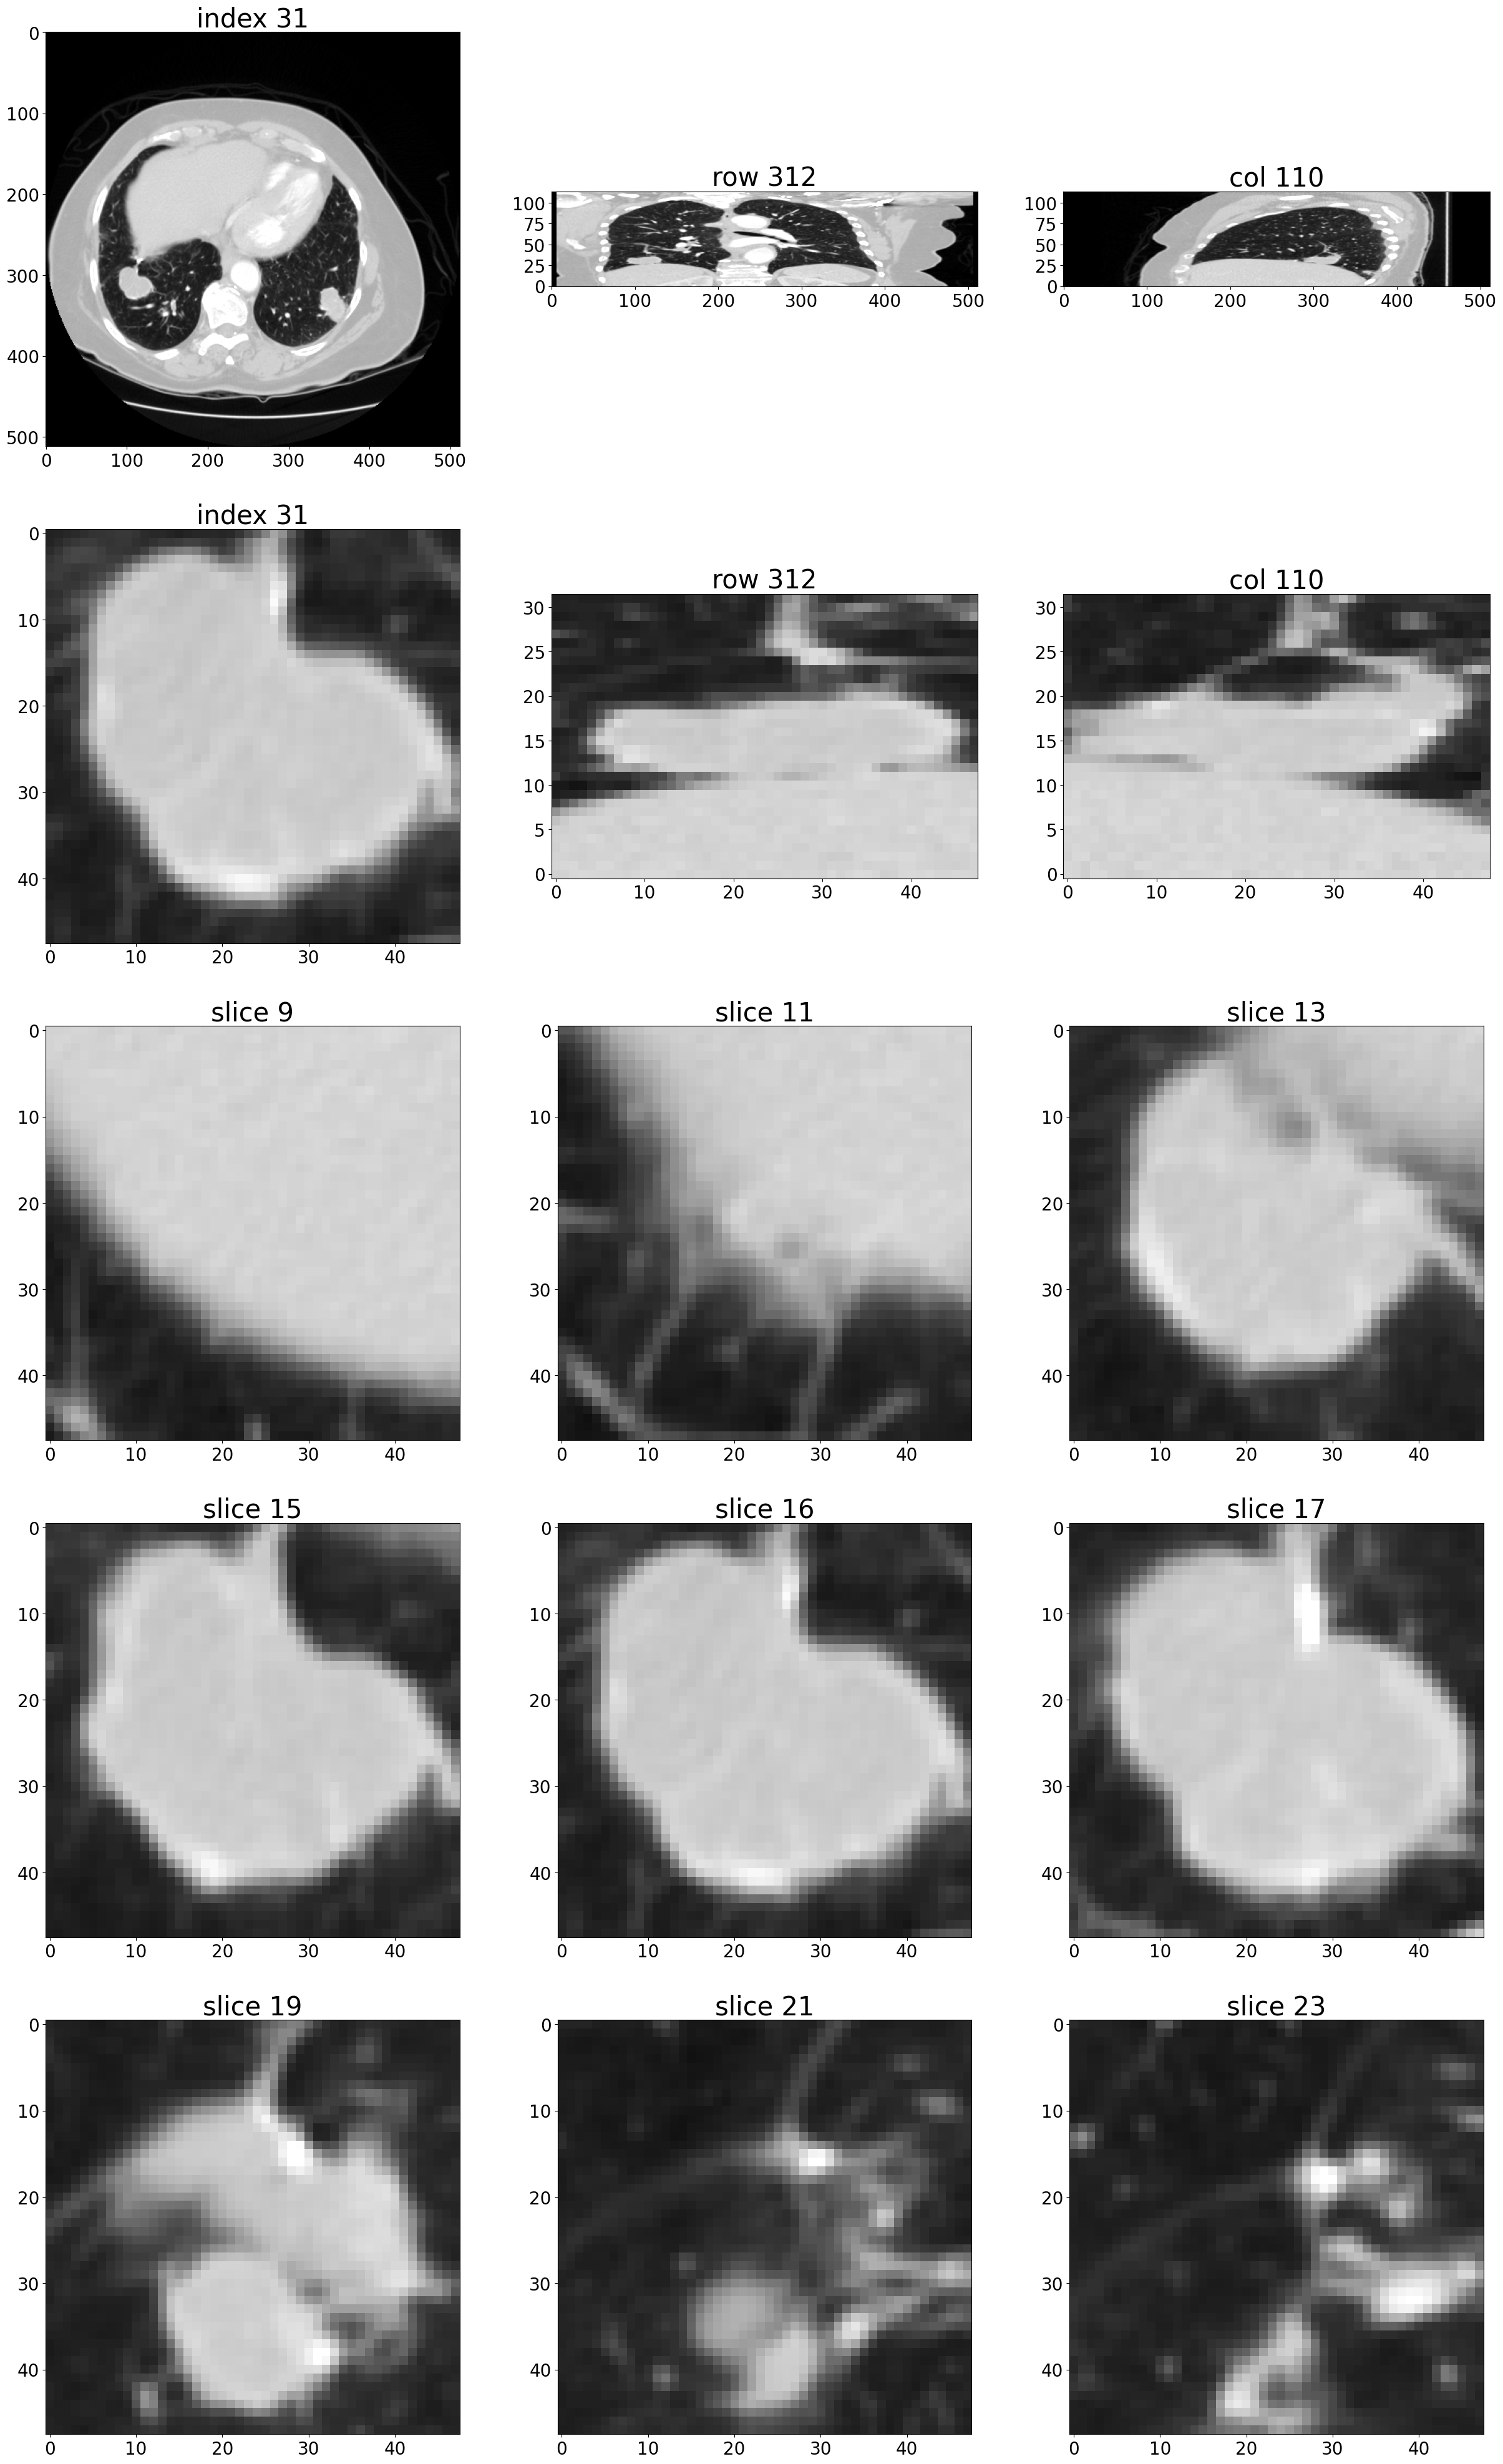

In [21]:
from p2ch14.vis import showCandidate
print(sample)
showCandidate(positiveSample_list[5].series_uid)